### Credit Card Customer Segmentation

In [ ]:
# Load Core Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator

#### Load the data

In [2]:
credit_card = pd.read_csv("C:/Users/hp/Desktop/Data Glacier Intership/Data/Credit Card Customers/Bank Credit Card.csv")

In [3]:
# View first five instances, cases 
credit_card.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  (76) 880-5383  Existing Customer            45      M                3   
1  (81) 877-0008  Existing Customer            49      F                5   
2  (71) 398-2108  Existing Customer            51      M                3   
3  (76) 991-1858  Existing Customer            40      F                4   
4  (70) 910-6358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

### Data Preprocessing 

##### a)Checking for the Structure of the Data and For missing Values 

In [4]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  object 
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

There is no missing value in the data. Most of the variables are numeric variables , while only few are categorical 


##### b) Looking at the distribution and some statistical summaries of the Variables

In [5]:
# Numerical Columns
num_col= credit_card.columns[credit_card.dtypes != "object"]
print("Numerical  Columns:", num_col,"\n\n")

# Categorical Colums
cat_col = credit_card.columns[credit_card.dtypes == "object"]
print("Categorical Columns: ", cat_col)

Numerical  Columns: Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object') 


Categorical Columns:  Index(['CLIENTNUM', 'Attrition_Flag', 'Gender', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category'],
      dtype='object')


------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Customer_Age
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64
------------------------------------------------------------------------------------------------------------


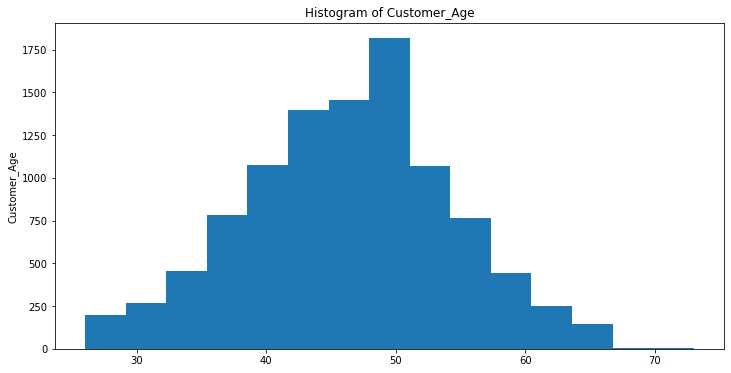

------------------------------------------------------------------------------------------------------------


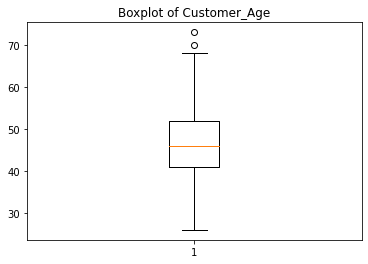

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Dependent_count
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean         2.346203
std          1.298908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Dependent_count, dtype: float64
------------------------------------------------------------------------------------------------------------


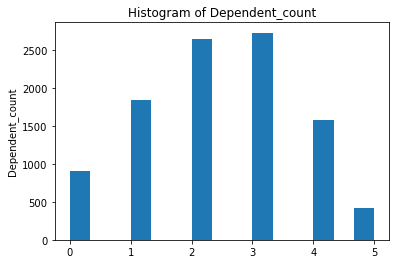

------------------------------------------------------------------------------------------------------------


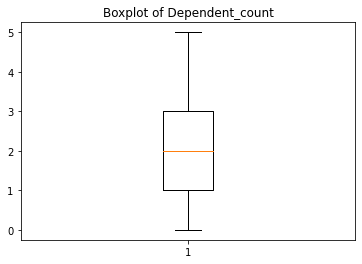

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Months_on_book
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64
------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------


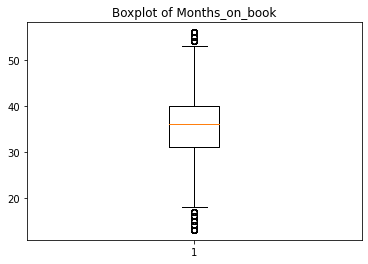

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Total_Relationship_Count
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean         3.812580
std          1.554408
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Total_Relationship_Count, dtype: float64
------------------------------------------------------------------------------------------------------------


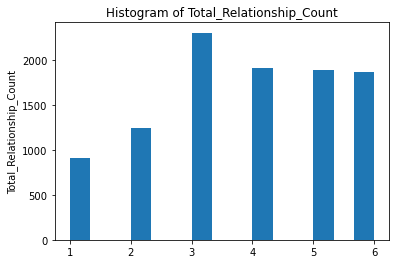

------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Months_Inactive_12_mon
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean         2.341167
std          1.010622
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Months_Inactive_12_mon, dtype: float64
------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Contacts_Count_12_mon
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean         2.455317
std          1.106225
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Contacts_Count_12_mon, dtype: float64
------------------------------------------------------------------------------------------------------------


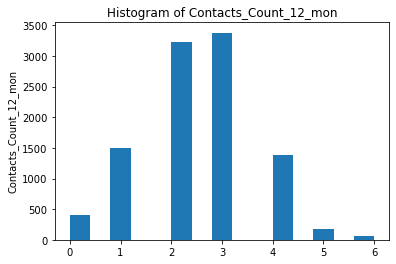

------------------------------------------------------------------------------------------------------------


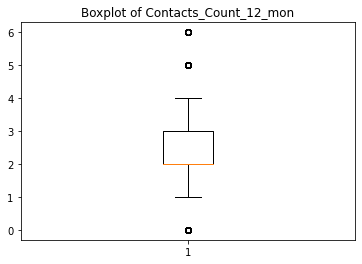

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Credit_Limit
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64
------------------------------------------------------------------------------------------------------------


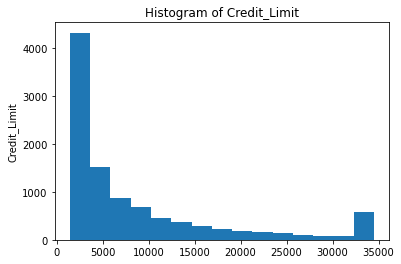

------------------------------------------------------------------------------------------------------------


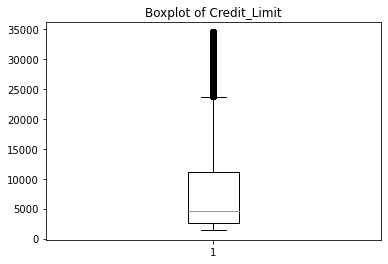

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Total_Revolving_Bal
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64
------------------------------------------------------------------------------------------------------------


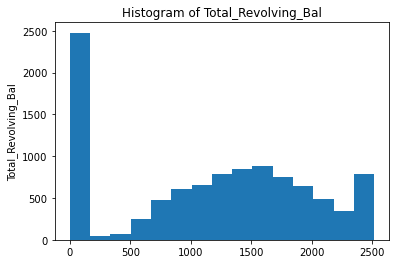

------------------------------------------------------------------------------------------------------------


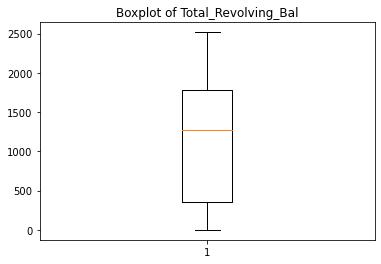

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Avg_Open_To_Buy
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: Avg_Open_To_Buy, dtype: float64
------------------------------------------------------------------------------------------------------------


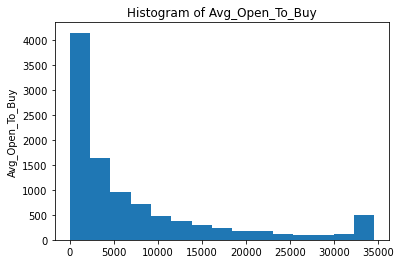

------------------------------------------------------------------------------------------------------------


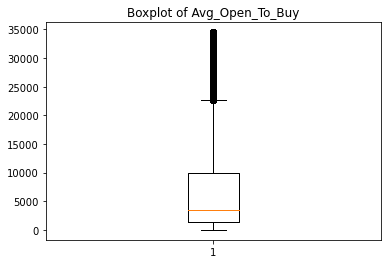

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Total_Amt_Chng_Q4_Q1
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean         0.759941
std          0.219207
min          0.000000
25%          0.631000
50%          0.736000
75%          0.859000
max          3.397000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64
------------------------------------------------------------------------------------------------------------


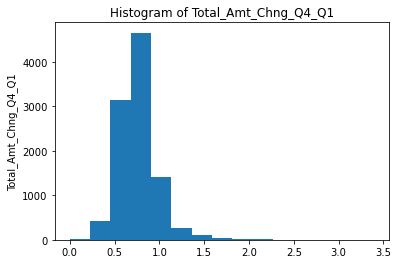

------------------------------------------------------------------------------------------------------------


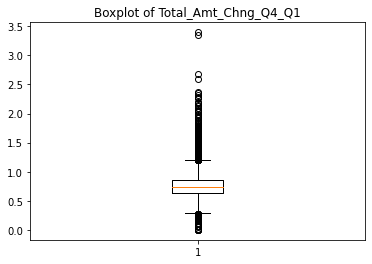

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Total_Trans_Amt
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64
------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Total_Trans_Ct
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64
------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------


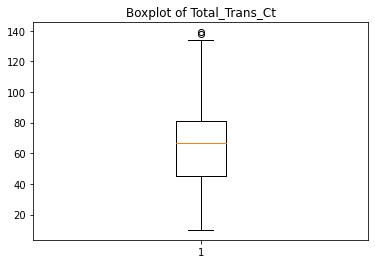

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Total_Ct_Chng_Q4_Q1
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean         0.712222
std          0.238086
min          0.000000
25%          0.582000
50%          0.702000
75%          0.818000
max          3.714000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64
------------------------------------------------------------------------------------------------------------


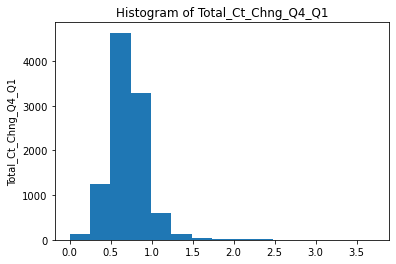

------------------------------------------------------------------------------------------------------------


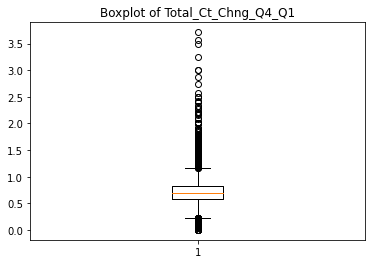

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Avg_Utilization_Ratio
------------------------------------------------------------------------------------------------------------
count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64
------------------------------------------------------------------------------------------------------------


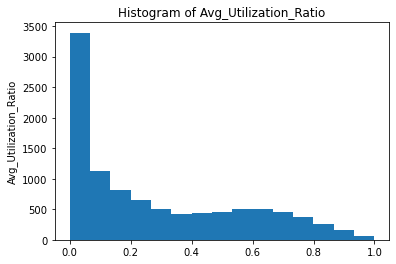

------------------------------------------------------------------------------------------------------------


In [6]:
## Discriptive Analysis
plt.figure(figsize=(12,6))

for col in num_col:
    print("------------------------------------------------------------------------------------------------------------")
    print("DESCRIPTIVE ANALYSIS:", col)
    print("------------------------------------------------------------------------------------------------------------")
    
    print(credit_card[col].describe())
    # histogram
    
    print("------------------------------------------------------------------------------------------------------------")
    plt.hist(credit_card[col], bins=15)
    plt.ylabel(col)
    plt.title("Histogram of "+ col)
    plt.savefig("hist"+col)
    plt.show()
    
    print("------------------------------------------------------------------------------------------------------------")
    
    
    plt.boxplot(credit_card[col],)
    plt.title("Boxplot of "+ col)
    plt.savefig("box"+col)
    plt.show()
    

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Attrition_Flag
------------------------------------------------------------------------------------------------------------
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


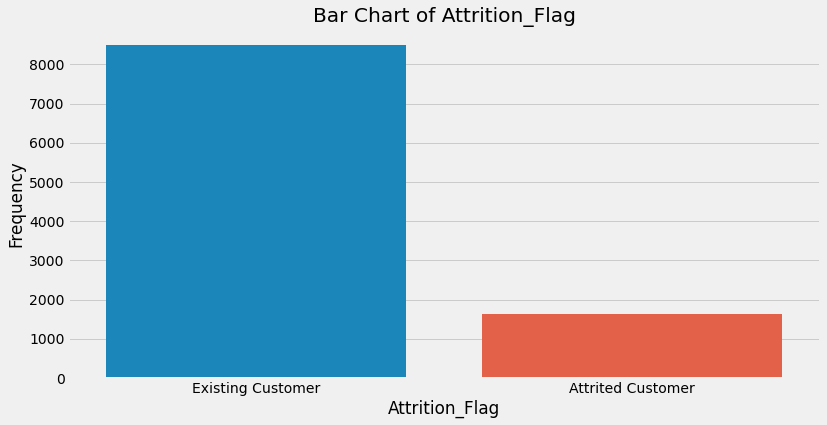

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Gender
------------------------------------------------------------------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64


------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Education_Level
------------------------------------------------------------------------------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


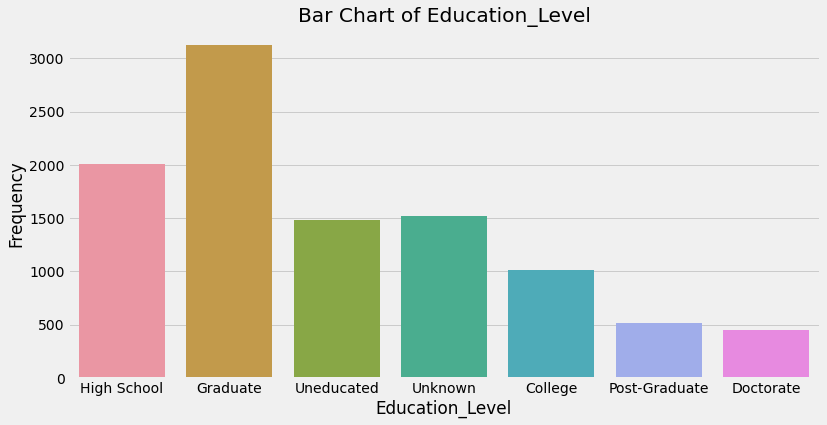

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Marital_Status
------------------------------------------------------------------------------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64


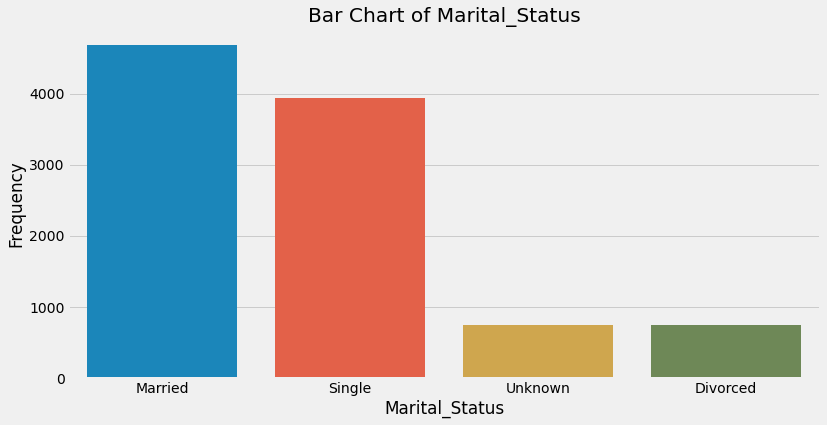

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Income_Category
------------------------------------------------------------------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


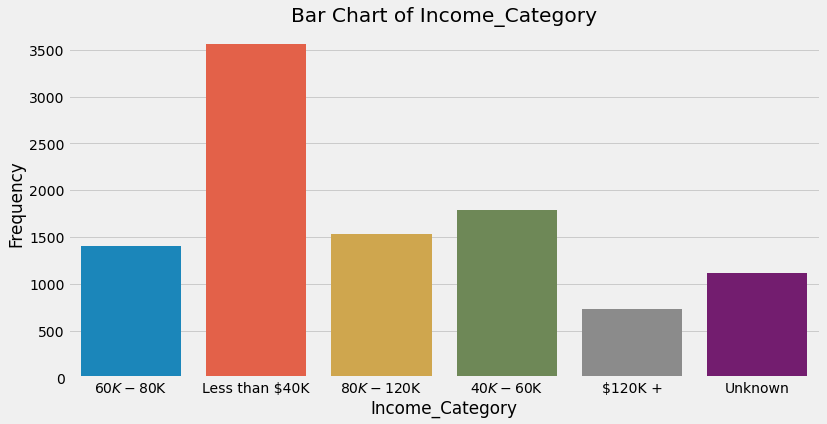

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Card_Category
------------------------------------------------------------------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


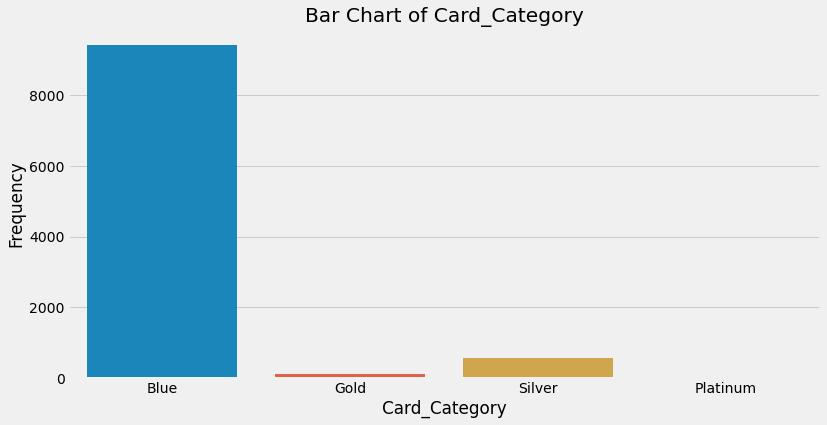

In [121]:
## Discriptive Analysis

for col in cat_col[1:]:
    plt.figure(figsize=(12,6))
    print("------------------------------------------------------------------------------------------------------------")
    print("DESCRIPTIVE ANALYSIS:", col)
    print("------------------------------------------------------------------------------------------------------------")
    print(credit_card[col].value_counts())
    sns.countplot(credit_card[col])
    plt.ylabel('Frequency')
    plt.title("Bar Chart of "+ col)
    plt.savefig(col)
    plt.show()
    
   

In [122]:
### Selcting only the existing customers
credit_card_exist = credit_card[credit_card["Attrition_Flag"] == "Existing Customer"]

## Dropping unnecessary Columns
credit_card_exist.drop(labels=["CLIENTNUM","Attrition_Flag"],axis=1,inplace=True)
credit_card_exist.head(3)

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   
2            51      M                3        Graduate        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000

In [124]:
# Numerical Columns
num_col1= credit_card_exist.columns[credit_card_exist.dtypes != "object"]
print("Numerical  Columns:", num_col1,"\n\n")

# Categorical Colums
cat_col1 = credit_card_exist.columns[credit_card_exist.dtypes == "object"]
print("Categorical Columns: ", cat_col1)

Numerical  Columns: Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object') 


Categorical Columns:  Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


In [125]:
credit_card_exist_Adjuested = credit_card_exist.copy()

In [126]:
for col in cat_col1:
    labelencoder= LabelEncoder()
    credit_card_exist_Adjuested[col]= labelencoder.fit_transform(credit_card_exist_Adjuested[col])

In [127]:
credit_card_exist_Adjuested.head(3)

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0            45       1                3                3               1   
1            49       0                5                2               2   
2            51       1                3                2               1   

   Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0                2              0              39                         5   
1                4              0              44                         6   
2                3              0              36                         4   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000

#### Scaling the datasets

In [128]:
scaler = StandardScaler()
scaled_data= scaler.fit_transform(credit_card_exist_Adjuested)
scaled_data = pd.DataFrame(scaled_data,columns=credit_card_exist_Adjuested.columns)
scaled_data.head(5)

Customer_Age    Gender  Dependent_count  Education_Level  Marital_Status  \
0     -0.156190  1.042797         0.509985        -0.050294       -0.621540   
1      0.338818 -0.958959         2.044726        -0.596270        0.737279   
2      0.586322  1.042797         0.509985        -0.596270       -0.621540   
3     -0.774949 -0.958959         1.277356        -0.050294        2.096098   
4     -0.774949  1.042797         0.509985         1.041658       -0.621540   

   Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0        -0.567691      -0.260545        0.388889                  0.709949   
1         0.764365      -0.260545        1.012227                  1.364031   
2         0.098337      -0.260545        0.014887                  0.055866   
3         0.764365      -0.260545       -0.234448                 -0.598216   
4        -0.567691      -0.260545       -1.855126                  0.709949   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0               -1.252865               0.595213      0.436364   
1               -1.252865              -0.329538     -0.051833   
2               -1.252865              -2.179040     -0.584393   
3                1.697912              -1.254289     -0.595951   
4               -1.252865              -2.179040     -0.441511   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0            -0.632973         0.489013              2.582952   
1            -0.518152        -0.008614              3.528902   
2            -1.658444        -0.445935              8.364270   
3             1.663448        -0.734475              2.904391   
4            -1.658444        -0.303096              6.440225   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0        -0.999456       -1.163844             3.870206              -0.863732  
1        -0.957606       -1.556554            13.030836              -0.702295  
2        -0.787930       -2.123802             6.974909              -1.087543  
3        -0.991770       -2.123802             6.974909               1.700918  
4        -1.092835       -1.774727             7.707234              -1.087543

In [129]:
## Elbow Method for Selecting K
sse = []
for k in np.arange(1,10,1):
    kmeans = KMeans(n_clusters=k,n_init=10,max_iter=300,random_state=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

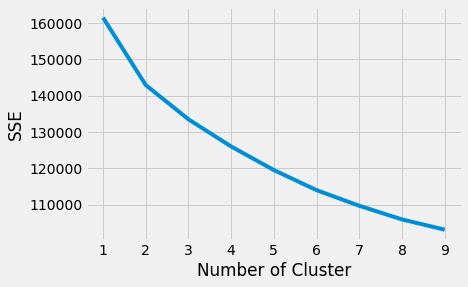

In [130]:
plt.style.use("fivethirtyeight")
plt.plot(np.arange(1,10,1),sse)
plt.xticks(np.arange(1,10,1))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [131]:
### USig the Kneed PAckahe to Selec the Cluster
K1 = KneeLocator(np.arange(1,10,1),sse,curve="convex",direction="decreasing")
K1.elbow

4

In [134]:
# Initializing the model
kmeans = KMeans(n_clusters=4,n_init=10,max_iter=300,random_state=10)

# Fitting the model
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=10)

In [135]:
clusters= kmeans.labels_
clusters

array([1, 1, 1, ..., 3, 3, 3])

#### Dimensional Reduction

In [137]:
pca = PCA(n_components=2,random_state=0)
principal_components = pca.fit_transform(scaled_data)
principal_componentsDF = pd.DataFrame(principal_components,columns=["PC1","PC2"])

In [138]:
principal_componentsDF["Cluster"] = clusters+ 1
principal_componentsDF.head()

PC1       PC2  Cluster
0  0.596768 -2.453048        2
1 -1.219108 -2.053391        2
2 -0.618253 -2.404123        2
3 -2.649841 -0.571274        3
4 -0.335920 -2.229917        2

In [139]:
principal_componentsDF['Label'] =principal_componentsDF["Cluster"].map({1:"Cluster 1",2:"Clsuter 2",3:"Cluster 3",\
    4:"Cluster 4"})

In [140]:
principal_componentsDF

PC1       PC2  Cluster      Label
0     0.596768 -2.453048        2  Clsuter 2
1    -1.219108 -2.053391        2  Clsuter 2
2    -0.618253 -2.404123        2  Clsuter 2
3    -2.649841 -0.571274        3  Cluster 3
4    -0.335920 -2.229917        2  Clsuter 2
...        ...       ...      ...        ...
8495  1.969773  3.254174        4  Cluster 4
8496  2.130898  1.449484        4  Cluster 4
8497  1.772645  2.245515        4  Cluster 4
8498  0.055700  2.664152        4  Cluster 4
8499  0.588105  2.627535        4  Cluster 4

[8500 rows x 4 columns]

In [141]:
plt.figure(figsize=(10,20))
ax=sns.lmplot(data=principal_componentsDF,x="PC1",y="PC2",hue="Label",fit_reg=False,legend=True,legend_out=True)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters")
plt.show()

<Figure size 720x1440 with 0 Axes>

In [142]:
credit_card_exist["Cluster"] = principal_componentsDF["Cluster"]
credit_card_exist["Label"] =principal_componentsDF["Label"]
credit_card_exist.head(3)

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   
2            51      M                3        Graduate        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   

   Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
0                       1  ...       12691.0                  777   
1                       1  ...        8256.0                  864   
2                       1  ...        3418.0                    0   

   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0          11914.0                 1.335             1144              42   
1           7392.0                 1.541             1291              33   
2           3418.0                 2.594             1887              20   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Cluster      Label  
0                1.625                  0.061      2.0  Clsuter 2  
1                3.714                  0.105      2.0  Clsuter 2  
2                2.333                  0.000      2.0  Clsuter 2  

[3 rows x 21 columns]

In [143]:
def summary(df):
        mean= df.mean()
        maxi= df.max()
        mini= df.min()
        median=df.median()
        rang =maxi- mini
        var= df.var()
        return(pd.DataFrame({"Minimum":mini, "Average":mean,"Maximum":maxi,"Range":rang,"Variance":var},index=["Values"]))
    
    

#### Cluster One

In [144]:
## Cluster One
C1 = credit_card_exist[credit_card_exist["Cluster"]==1]
## Discriptive Analysis
plt.figure(figsize=(12,6))

for col in num_col1:
    print("------------------------------------------------------------------------------------------------------------")
    print("DESCRIPTIVE ANALYSIS:", col)
    print("------------------------------------------------------------------------------------------------------------")
    
    print(summary(C1[col]),"\n\n\n")
    
C1.head(3)

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Customer_Age
------------------------------------------------------------------------------------------------------------
        Minimum    Average  Maximum  Range   Variance
Values       26  46.283937       70     44  64.742618 



------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Dependent_count
------------------------------------------------------------------------------------------------------------
        Minimum   Average  Maximum  Range  Variance
Values        0  2.323529        5      5  1.612084 



------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Months_on_book
------------------------------------------------------------------------------------------------------------
        Minimum 

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
6            51      M                4         Unknown        Married   
7            32      M                0     High School        Unknown   
8            37      M                3      Uneducated         Single   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
6         $120K +          Gold              46                         6   
7     $60K - $80K        Silver              27                         2   
8     $60K - $80K          Blue              36                         5   

   Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
6                       1  ...       34516.0                 2264   
7                       2  ...       29081.0                 1396   
8                       2  ...       22352.0                 2517   

   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6          32252.0                 1.975             1330              31   
7          27685.0                 2.204             1538              36   
8          19835.0                 3.355             1350              24   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Cluster      Label  
6                0.722                  0.066      1.0  Cluster 1  
7                0.714                  0.048      1.0  Cluster 1  
8                1.182                  0.113      1.0  Cluster 1  

[3 rows x 21 columns]

<Figure size 864x432 with 0 Axes>

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Education_Level
------------------------------------------------------------------------------------------------------------
Graduate         271
High School      178
Uneducated       130
Unknown          121
College           92
Post-Graduate     47
Doctorate         45
Name: Education_Level, dtype: int64


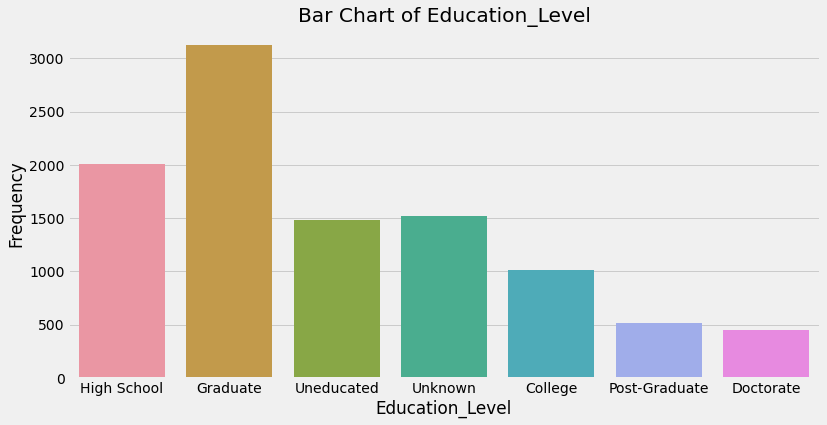

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Marital_Status
------------------------------------------------------------------------------------------------------------
Married     423
Single      339
Divorced     63
Unknown      59
Name: Marital_Status, dtype: int64


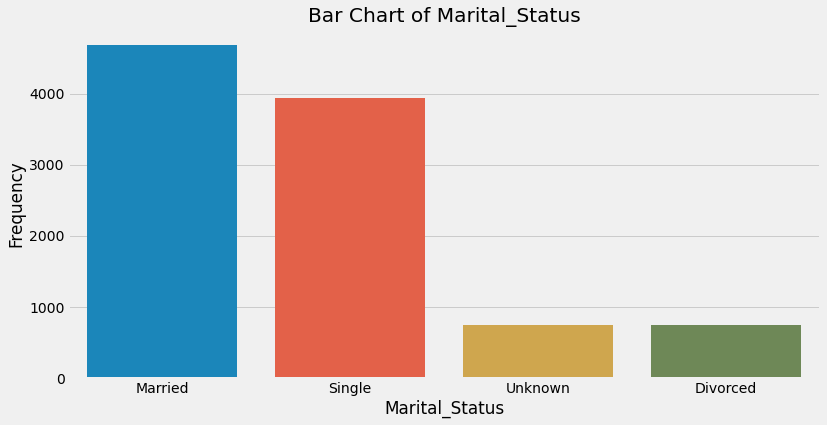

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Income_Category
------------------------------------------------------------------------------------------------------------
Less than $40K    301
$40K - $60K       167
$80K - $120K      139
$60K - $80K       121
Unknown            88
$120K +            68
Name: Income_Category, dtype: int64


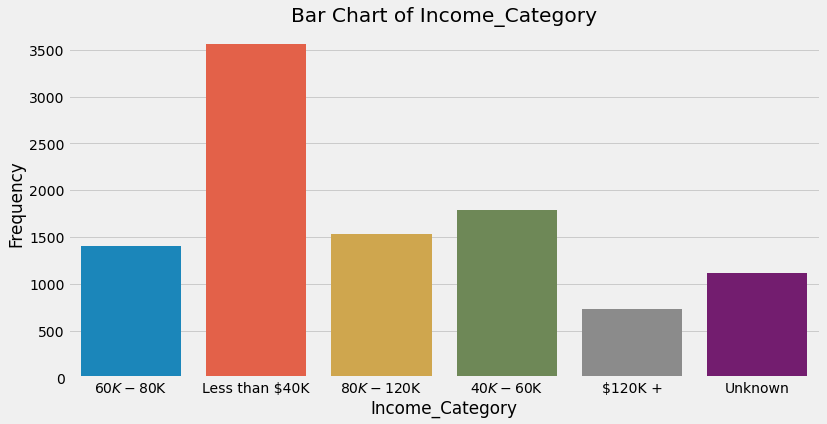

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Card_Category
------------------------------------------------------------------------------------------------------------
Blue        834
Silver       39
Gold          9
Platinum      2
Name: Card_Category, dtype: int64


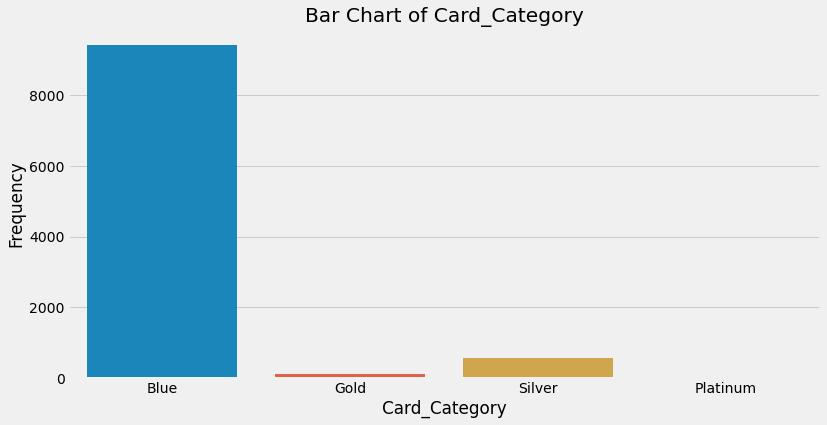

In [149]:
for col in cat_col1[1:]:
    plt.figure(figsize=(12,6))
    print("------------------------------------------------------------------------------------------------------------")
    print("DESCRIPTIVE ANALYSIS:", col)
    print("------------------------------------------------------------------------------------------------------------")
    
    print(C1[col].value_counts())
    sns.countplot(credit_card[col])
    plt.ylabel('Frequency')
    plt.title("Bar Chart of "+ col)
    plt.show()
    

#### Cluster Two

In [145]:
## Cluster One
C2 = credit_card_exist[credit_card_exist["Cluster"]==2]
## Discriptive Analysis
plt.figure(figsize=(12,6))

for col in num_col1:
    print("------------------------------------------------------------------------------------------------------------")
    print("DESCRIPTIVE ANALYSIS:", col)
    print("------------------------------------------------------------------------------------------------------------")
    
    print(summary(C2[col]),"\n\n\n")
    
C2.head(3)

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Customer_Age
------------------------------------------------------------------------------------------------------------
        Minimum    Average  Maximum  Range   Variance
Values       26  46.174775       68     42  74.778022 



------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Dependent_count
------------------------------------------------------------------------------------------------------------
        Minimum   Average  Maximum  Range  Variance
Values        0  2.266306        5      5  1.735472 



------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Months_on_book
------------------------------------------------------------------------------------------------------------
        Minimum 

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   
2            51      M                3        Graduate        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   

   Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
0                       1  ...       12691.0                  777   
1                       1  ...        8256.0                  864   
2                       1  ...        3418.0                    0   

   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0          11914.0                 1.335             1144              42   
1           7392.0                 1.541             1291              33   
2           3418.0                 2.594             1887              20   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Cluster      Label  
0                1.625                  0.061      2.0  Clsuter 2  
1                3.714                  0.105      2.0  Clsuter 2  
2                2.333                  0.000      2.0  Clsuter 2  

[3 rows x 21 columns]

<Figure size 864x432 with 0 Axes>

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Education_Level
------------------------------------------------------------------------------------------------------------
Graduate         865
High School      563
Unknown          420
Uneducated       402
College          270
Post-Graduate    137
Doctorate        118
Name: Education_Level, dtype: int64


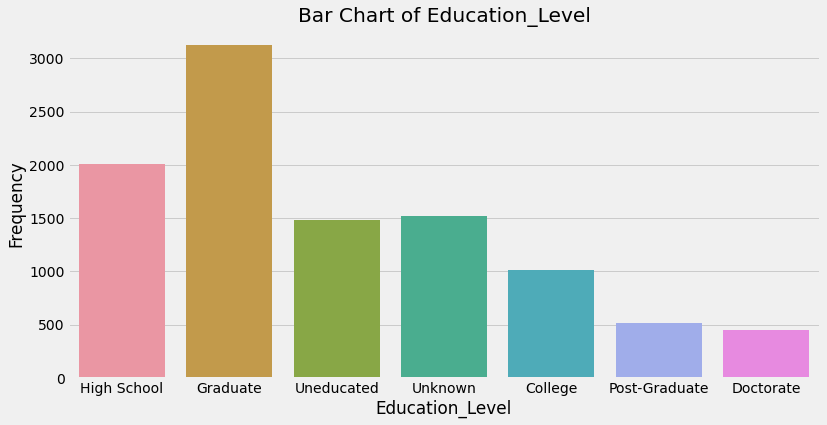

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Marital_Status
------------------------------------------------------------------------------------------------------------
Married     1317
Single      1052
Divorced     207
Unknown      199
Name: Marital_Status, dtype: int64


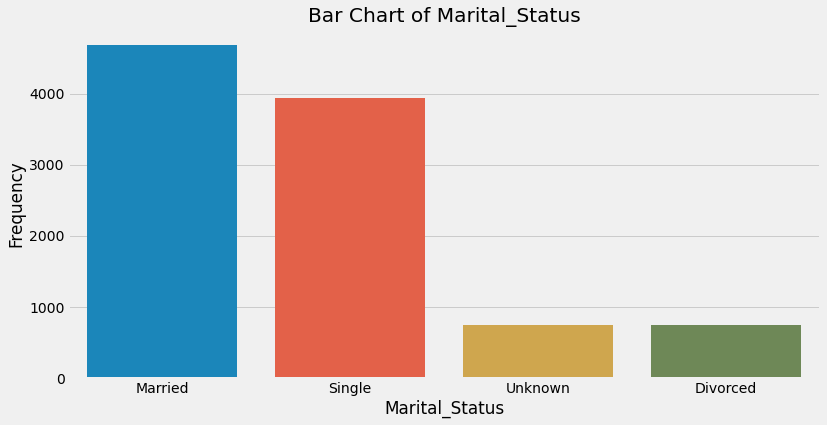

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Income_Category
------------------------------------------------------------------------------------------------------------
Less than $40K    942
$40K - $60K       479
$80K - $120K      444
$60K - $80K       421
Unknown           301
$120K +           188
Name: Income_Category, dtype: int64


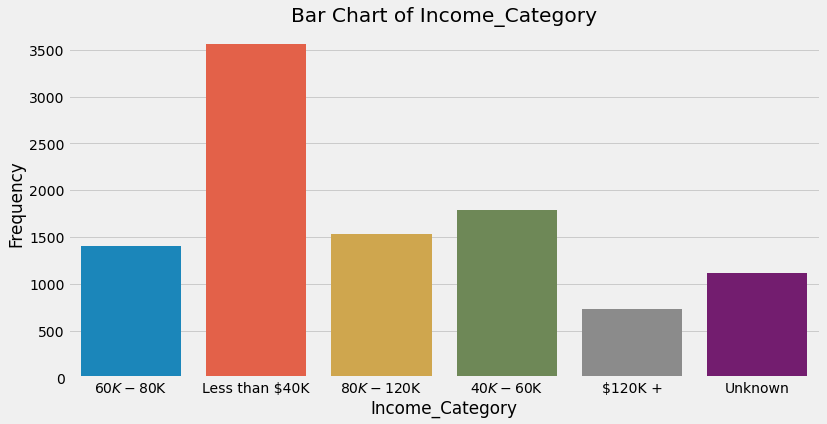

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Card_Category
------------------------------------------------------------------------------------------------------------
Blue      2646
Silver     118
Gold        11
Name: Card_Category, dtype: int64


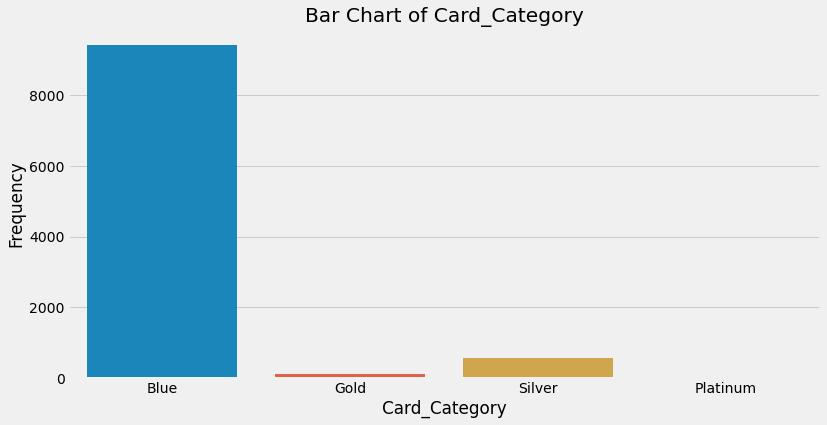

In [150]:
for col in cat_col1[1:]:
    plt.figure(figsize=(12,6))
    print("------------------------------------------------------------------------------------------------------------")
    print("DESCRIPTIVE ANALYSIS:", col)
    print("------------------------------------------------------------------------------------------------------------")
    
    print(C2[col].value_counts())
    sns.countplot(credit_card[col])
    plt.ylabel('Frequency')
    plt.title("Bar Chart of "+ col)
    plt.show()
    

#### Cluster Three

In [146]:
## Cluster One
C3 = credit_card_exist[credit_card_exist["Cluster"]==3]
## Discriptive Analysis

for col in num_col1:
    print("------------------------------------------------------------------------------------------------------------")
    print("DESCRIPTIVE ANALYSIS:", col)
    print("------------------------------------------------------------------------------------------------------------")
    
    print(summary(C3[col]),"\n\n\n")
    
C3.head(3)

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Customer_Age
------------------------------------------------------------------------------------------------------------
        Minimum    Average  Maximum  Range   Variance
Values       26  46.500877       73     47  65.749034 



------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Dependent_count
------------------------------------------------------------------------------------------------------------
        Minimum   Average  Maximum  Range  Variance
Values        0  2.326903        5      5  1.725378 



------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Months_on_book
------------------------------------------------------------------------------------------------------------
        Minimum 

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
3             40      F                4     High School        Unknown   
14            57      F                2        Graduate        Married   
18            61      M                1     High School        Married   

   Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
3   Less than $40K          Blue              34                         3   
14  Less than $40K          Blue              48                         5   
18     $40K - $60K          Blue              56                         2   

    Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
3                        4  ...        3313.0                 2517   
14                       2  ...        2436.0                  680   
18                       2  ...        3193.0                 2517   

    Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3             796.0                 1.405             1171              20   
14           1756.0                 1.190             1570              29   
18            676.0                 1.831             1336              30   

    Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Cluster      Label  
3                 2.333                  0.760      3.0  Cluster 3  
14                0.611                  0.279      3.0  Cluster 3  
18                1.143                  0.788      3.0  Cluster 3  

[3 rows x 21 columns]

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Education_Level
------------------------------------------------------------------------------------------------------------
Graduate         887
High School      573
Unknown          425
Uneducated       416
College          285
Post-Graduate    149
Doctorate        116
Name: Education_Level, dtype: int64


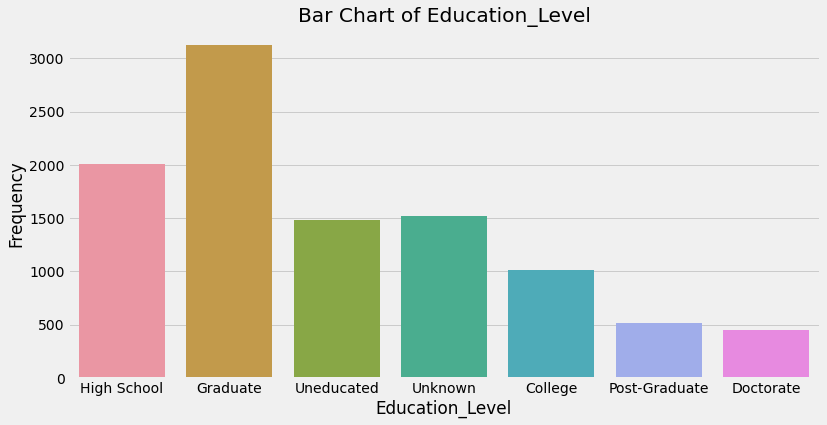

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Marital_Status
------------------------------------------------------------------------------------------------------------
Married     1352
Single      1094
Divorced     219
Unknown      186
Name: Marital_Status, dtype: int64


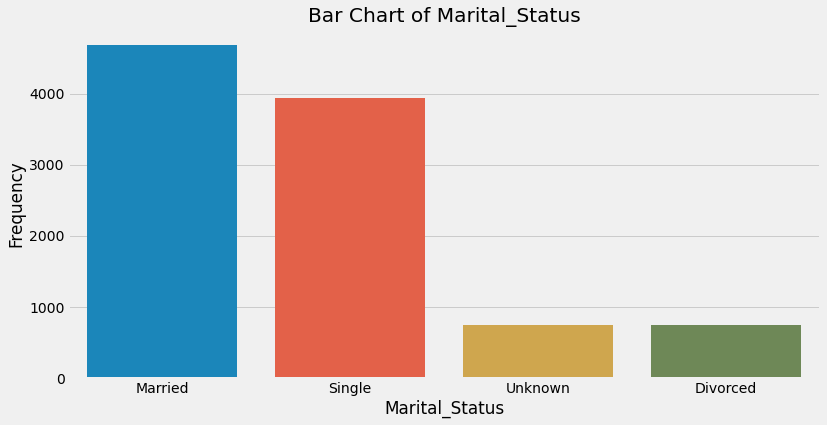

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Income_Category
------------------------------------------------------------------------------------------------------------
Less than $40K    1012
$40K - $60K        515
$80K - $120K       420
$60K - $80K        397
Unknown            320
$120K +            187
Name: Income_Category, dtype: int64


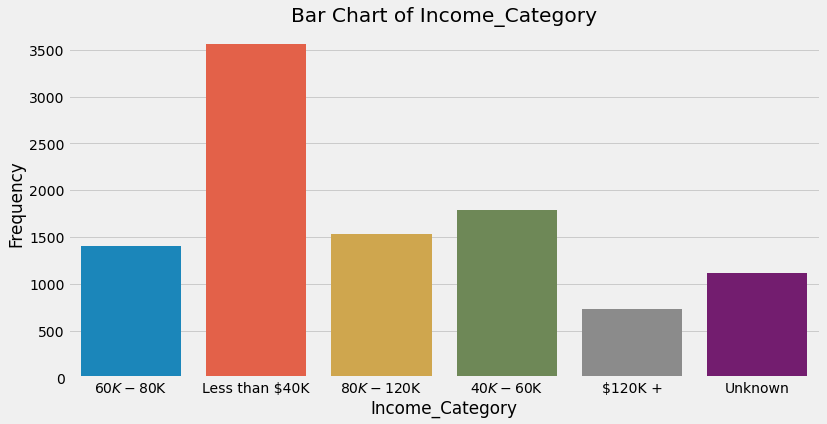

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Card_Category
------------------------------------------------------------------------------------------------------------
Blue      2730
Silver     107
Gold        14
Name: Card_Category, dtype: int64


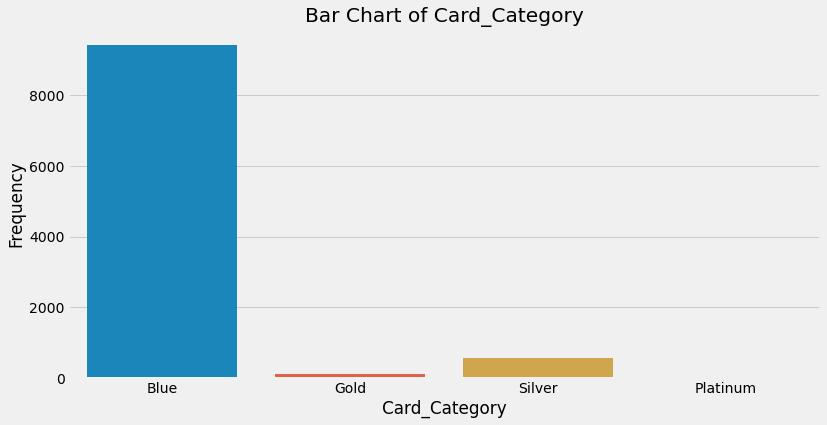

In [151]:
for col in cat_col1[1:]:
    plt.figure(figsize=(12,6))
    print("------------------------------------------------------------------------------------------------------------")
    print("DESCRIPTIVE ANALYSIS:", col)
    print("------------------------------------------------------------------------------------------------------------")
    
    print(C3[col].value_counts())
    sns.countplot(credit_card[col])
    plt.ylabel('Frequency')
    plt.title("Bar Chart of "+ col)
    plt.show()
    

#### Cluster Four

In [147]:
## Cluster One
C4 = credit_card_exist[credit_card_exist["Cluster"]==4]
## Discriptive Analysis

for col in num_col1:
    print("------------------------------------------------------------------------------------------------------------")
    print("DESCRIPTIVE ANALYSIS:", col)
    print("------------------------------------------------------------------------------------------------------------")
    
    print(summary(C4[col]),"\n\n\n")
    
C4.head(3)

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Customer_Age
------------------------------------------------------------------------------------------------------------
        Minimum    Average  Maximum  Range   Variance
Values       26  46.615276       63     37  48.880106 



------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Dependent_count
------------------------------------------------------------------------------------------------------------
        Minimum   Average  Maximum  Range  Variance
Values        0  2.536068        5      5  1.588995 



------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Months_on_book
------------------------------------------------------------------------------------------------------------
        Minimum 

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
6881            41      F                1     High School         Single   
7019            36      F                4         Unknown         Single   
7204            43      F                4      Uneducated        Married   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
6881  Less than $40K          Blue              31                         4   
7019  Less than $40K          Blue              26                         3   
7204  Less than $40K          Blue              36                         5   

      Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
6881                       2  ...        1998.0                    0   
7019                       2  ...        1438.3                    0   
7204                       3  ...        3006.0                  879   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6881           1998.0                 0.717             4637              68   
7019           1438.3                 0.827             4886              85   
7204           2127.0                 0.759             5125              87   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Cluster      Label  
6881                0.889                  0.000      4.0  Cluster 4  
7019                0.771                  0.000      4.0  Cluster 4  
7204                0.740                  0.292      4.0  Cluster 4  

[3 rows x 21 columns]

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Education_Level
------------------------------------------------------------------------------------------------------------
Graduate         212
High School      142
Unknown          112
College           96
Uneducated        94
Doctorate         30
Post-Graduate     21
Name: Education_Level, dtype: int64


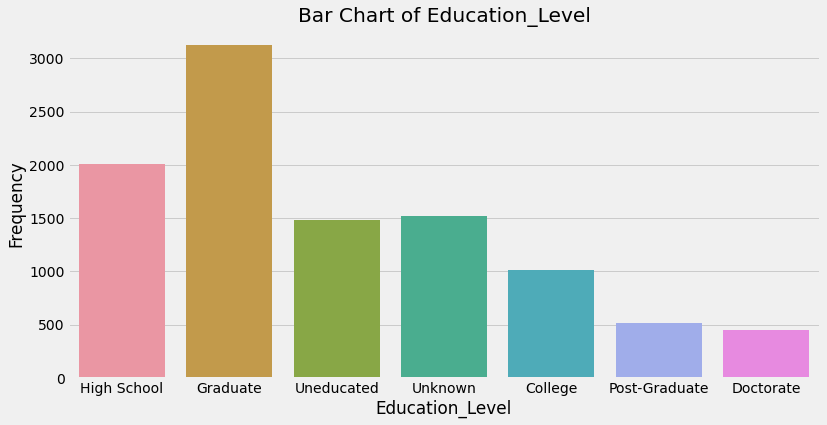

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Marital_Status
------------------------------------------------------------------------------------------------------------
Married     321
Single      283
Unknown      62
Divorced     41
Name: Marital_Status, dtype: int64


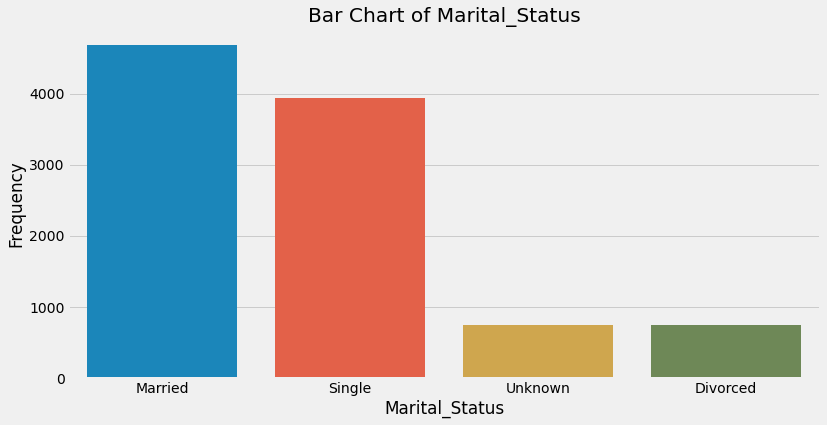

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Income_Category
------------------------------------------------------------------------------------------------------------
Less than $40K    325
$40K - $60K       123
Unknown           115
$60K - $80K        62
$80K - $120K       46
$120K +            36
Name: Income_Category, dtype: int64


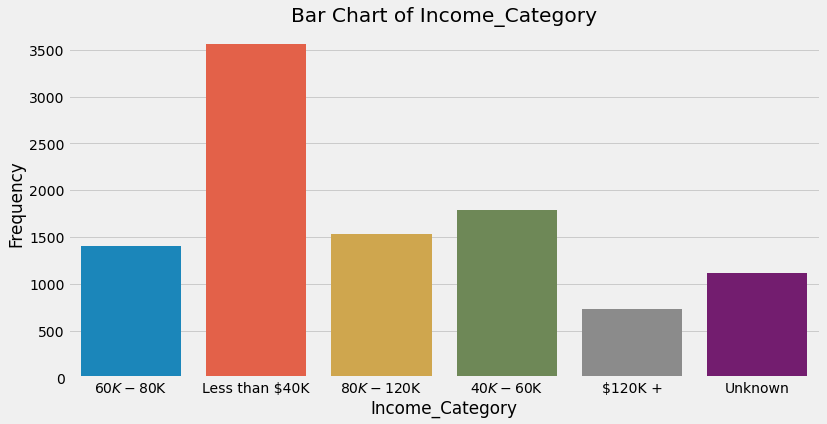

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Card_Category
------------------------------------------------------------------------------------------------------------
Blue      694
Silver     12
Gold        1
Name: Card_Category, dtype: int64


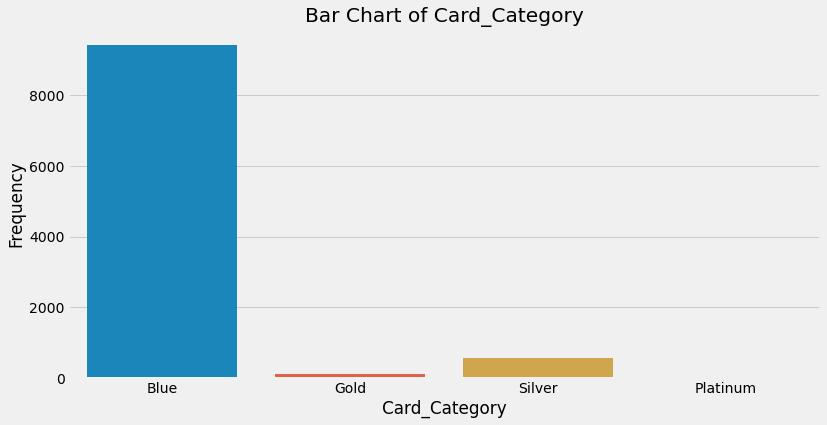

In [152]:
for col in cat_col1[1:]:
    plt.figure(figsize=(12,6))
    print("------------------------------------------------------------------------------------------------------------")
    print("DESCRIPTIVE ANALYSIS:", col)
    print("------------------------------------------------------------------------------------------------------------")
    
    print(C4[col].value_counts())
    sns.countplot(credit_card[col])
    plt.ylabel('Frequency')
    plt.title("Bar Chart of "+ col)
    plt.show()
    